In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [22]:
# import seaborn as sns
# # sns.set_theme(style="whitegrid")
# # sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("paper")

## Addition

In [23]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,2885.904018,3.1989,2.86,9148.854,8253.685491


In [24]:
adder_df

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,2885.904018,3.1989,2.86,9148.854,8253.685491
5,Addition_Original,32,400,2940.940819,3.3232,2.50,8308.000,7352.352047
6,Addition_Original,32,450,3102.758422,3.6948,2.22,8202.456,6888.123697
7,Addition_Original,32,500,3642.542436,4.6944,2.00,9388.800,7285.084872
8,Addition_Original,32,550,3887.856033,5.2689,1.82,9589.398,7075.897980
9,Addition_Original,32,600,4106.121641,5.6517,1.67,9438.339,6857.223140


In [25]:
adder_df[adder_df["Delay"] <= round(1000/adder_df["Freq."], 2)]

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,2885.904018,3.1989,2.86,9148.854,8253.685491
5,Addition_Original,32,400,2940.940819,3.3232,2.50,8308.000,7352.352047
6,Addition_Original,32,450,3102.758422,3.6948,2.22,8202.456,6888.123697
7,Addition_Original,32,500,3642.542436,4.6944,2.00,9388.800,7285.084872
8,Addition_Original,32,550,3887.856033,5.2689,1.82,9589.398,7075.897980
9,Addition_Original,32,600,4106.121641,5.6517,1.67,9438.339,6857.223140


In [26]:
# Remove non-constrained case
adder_df = adder_df[adder_df["Freq."]!=0]
adder_df = adder_df[adder_df["Delay"] <= round(1000/adder_df["Freq."], 2)]

area_df = adder_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = adder_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design Addition_Original Addition_HUB
Freq.                                
200          2500.646407  2390.102410
250          2500.646407  2390.102410
300          2622.009612  2416.915211
350          2885.904018  2525.577616
400          2940.940819  2661.758424

In [27]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Addition_HUB'] / area_df['Area']['Addition_Original']
power_gain = 100 * power_df['Power']['Addition_HUB'] / power_df['Power']['Addition_Original']
delay_gain = 100 * delay_df['Delay']['Addition_HUB'] / delay_df['Delay']['Addition_Original']
energy_gain = 100 * energy_df['Energy']['Addition_HUB'] / energy_df['Energy']['Addition_Original']
adp_gain = 100 * ADP_df['ADP']['Addition_HUB'] / ADP_df['ADP']['Addition_Original']

energy_gain

Freq.
200     82.939560
250    111.484550
300     89.551709
350     92.872550
400     98.239649
450     99.775360
500     82.543030
550     89.240638
600     88.175239
650     80.223028
700           NaN
750           NaN
dtype: float64

<Figure size 1000x500 with 0 Axes>

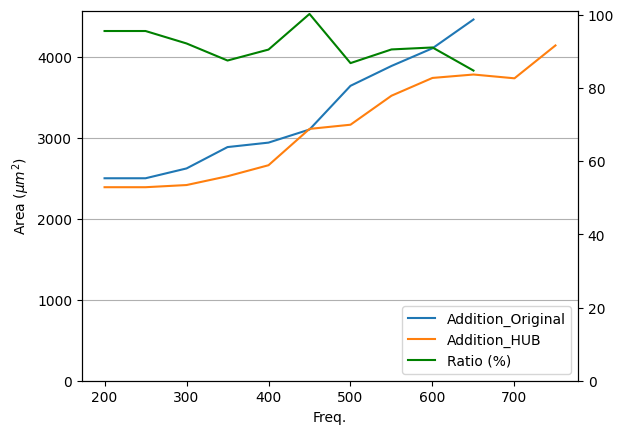

In [28]:
fig=plt.figure(figsize=(10,5))

ax1 = area_df.plot.line(
	y="Area",
	rot = 0,
	ylabel="Area ($\mu m^2$)",
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = area_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

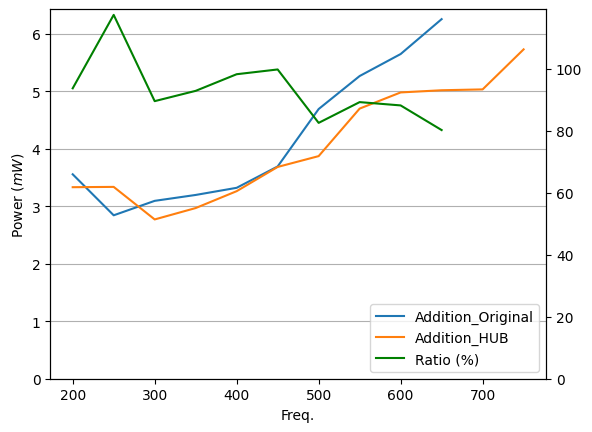

In [29]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel="Power ($mW$)"
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = power_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

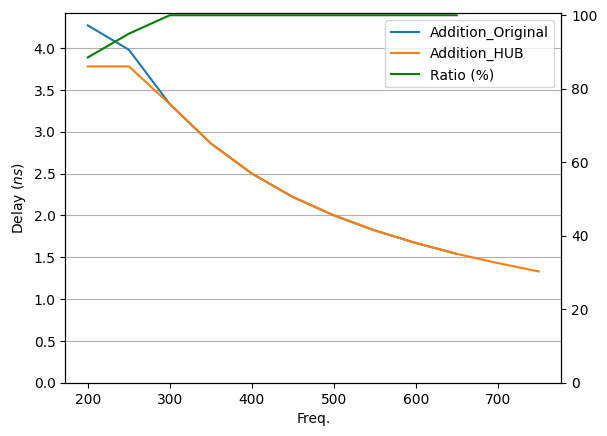

In [30]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel="Delay ($ns$)"
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = delay_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

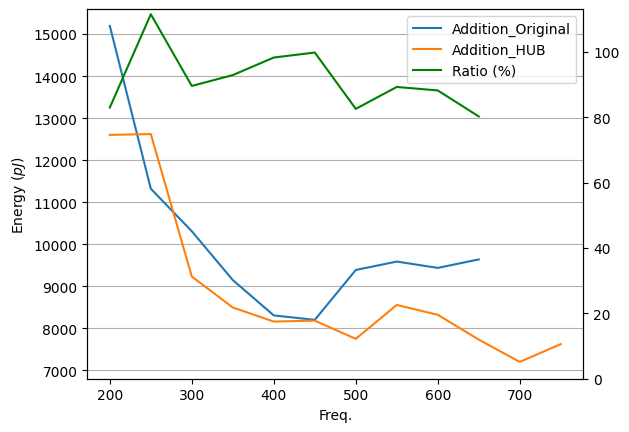

In [31]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel="Energy ($pJ$)"
)

ax2 = ax1.twinx()

ax2 = energy_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

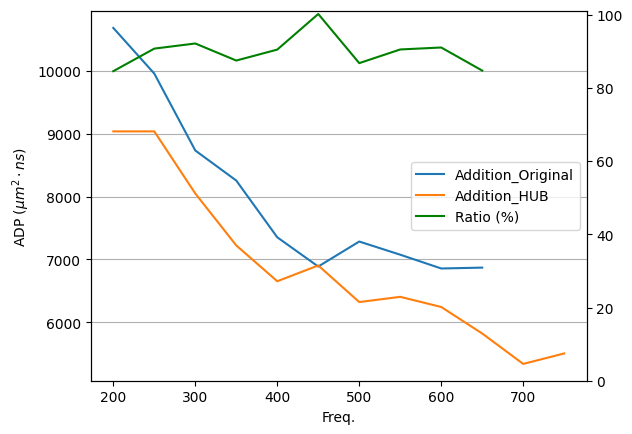

In [32]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
	y="ADP",
	rot = 0,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
)

ax2 = ax1.twinx()

ax2 = adp_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

## Multiplication

In [33]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,8145.446484,15.1352,2.85,43135.320,23214.522479


In [34]:
mult_df

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,8145.446484,15.1352,2.85,43135.320,23214.522479
5,Multiplication_Original,32,400,8322.316908,15.3901,2.50,38475.250,20805.792270
6,Multiplication_Original,32,450,9046.968161,17.3583,2.22,38535.426,20084.269317
7,Multiplication_Original,32,500,10436.059350,21.0143,2.00,42028.600,20872.118700
8,Multiplication_Original,32,550,11840.438565,24.7435,1.82,45033.170,21549.598188
9,Multiplication_Original,32,600,13266.691355,27.2299,1.70,46290.830,22553.375304


In [35]:
# Remove non-constrained case
mult_df = mult_df[mult_df["Freq."]!=0]
mult_df = mult_df[mult_df["Delay"] <= round(1000/mult_df["Freq."], 2)]

area_df = mult_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = mult_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area                   
Design Multiplication_Original Multiplication_HUB
Freq.                                            
200                7544.980847        7833.100853
250                7544.980847        7833.100853
300                7555.329648        7833.100853
350                8145.446484        7844.155253
400                8322.316908        8056.540866

In [36]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Multiplication_HUB'] / area_df['Area']['Multiplication_Original']
power_gain = 100 * power_df['Power']['Multiplication_HUB'] / power_df['Power']['Multiplication_Original']
delay_gain = 100 * delay_df['Delay']['Multiplication_HUB'] / delay_df['Delay']['Multiplication_Original']
energy_gain = 100 * energy_df['Energy']['Multiplication_HUB'] / energy_df['Energy']['Multiplication_Original']
adp_gain = 100 * ADP_df['ADP']['Multiplication_HUB'] / ADP_df['ADP']['Multiplication_Original']

energy_gain

Freq.
200     88.140488
250     88.078253
300     98.951611
350     97.383583
400     98.426261
450    106.250036
500     96.113123
550     96.854123
600           NaN
dtype: float64

<Figure size 1000x500 with 0 Axes>

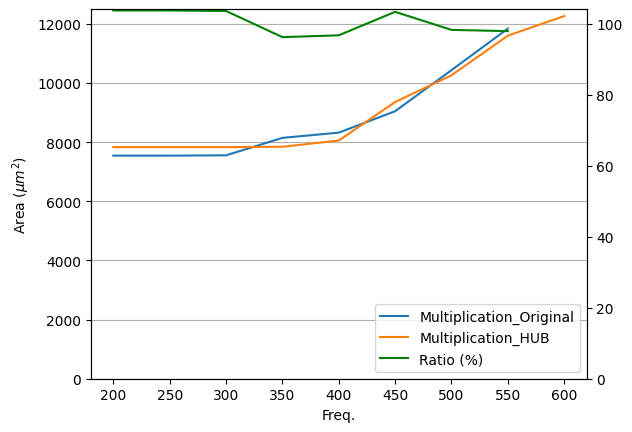

In [37]:
fig=plt.figure(figsize=(10,5))

ax1 = area_df.plot.line(
	y="Area",
	rot = 0,
	ylabel="Area ($\mu m^2$)",
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = area_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

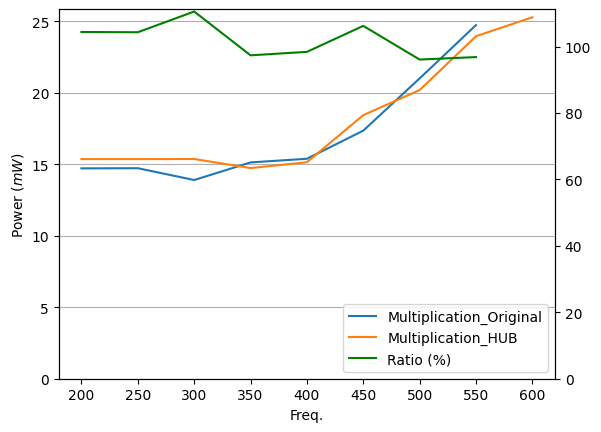

In [38]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel="Power ($mW$)"
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = power_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

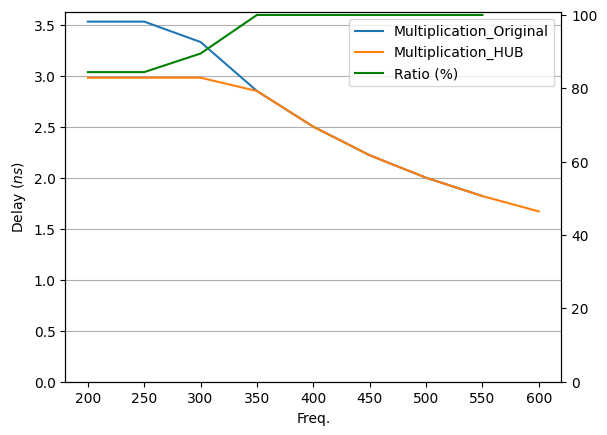

In [39]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel="Delay ($ns$)"
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = delay_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

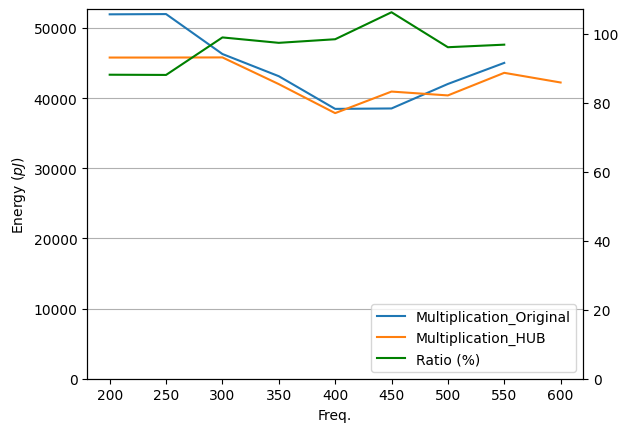

In [40]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel="Energy ($pJ$)"
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = energy_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

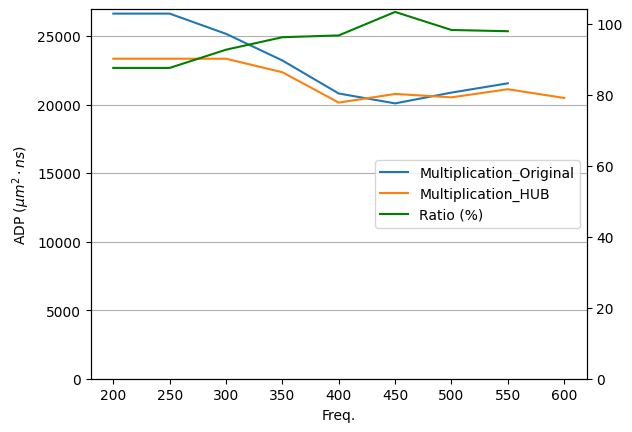

In [41]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
	y="ADP",
	rot = 0,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
)
ax1.set_ylim(0)

ax2 = ax1.twinx()

ax2 = adp_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend_ = None
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()